У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)
type(df)

pandas.core.frame.DataFrame

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

<Axes: ylabel='Frequency'>

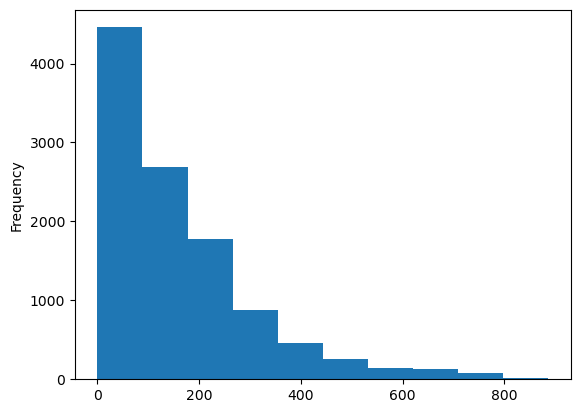

In [4]:
df['registered'].plot(kind = 'hist')

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

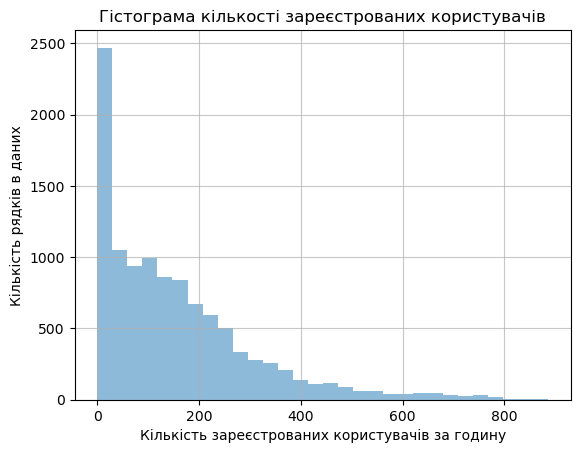

In [22]:
df['registered'].plot(kind = 'hist', bins = 30, alpha = .5)
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.grid(True, linestyle = '-', alpha = .7)

Дані демонструють асиметричний розподіл, більшість часу спостерігається низька активність, а високий попит має місце лише у певні короткі періоди. Це характерно для таких сервісів як прокат велосипедів, коли вони потрібні в певні години на короткий проміжок часу. Популярність сервісу залежить від часу доби, дня тижня або інших зовнішніх чинників, таких як погодні умови чи соціальні потреби.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [24]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [27]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [30]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

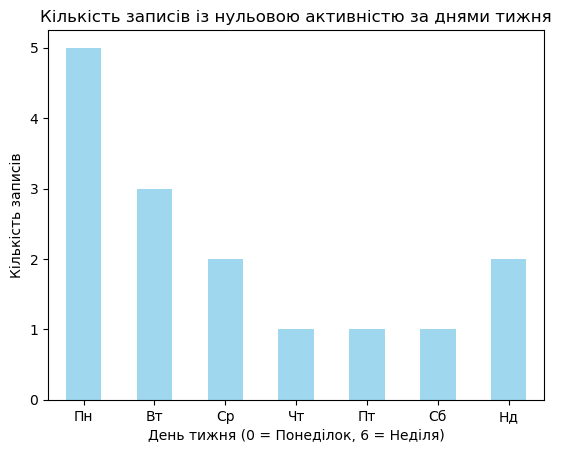

In [36]:
zero_registered = df[df['registered'] == 0]
zero_counts_by_day = zero_registered.groupby('dayofweek').size()
zero_counts_by_day.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title('Кількість записів із нульовою активністю за днями тижня')
plt.xlabel('День тижня (0 = Понеділок, 6 = Неділя)')
plt.ylabel('Кількість записів')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд'], rotation=0)
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

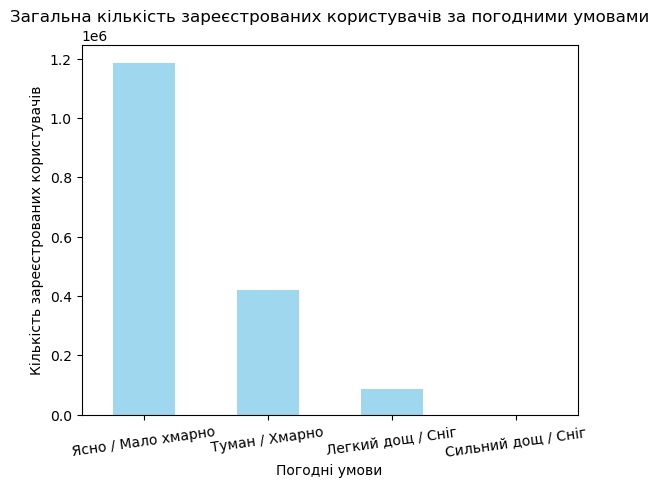

In [48]:
weather_registered_sum = df.groupby('weather')['registered'].sum()

weather_registered_sum.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title('Загальна кількість зареєстрованих користувачів за погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.xticks(ticks=range(len(weather_registered_sum)), 
           labels=[
               'Ясно / Мало хмарно', 
               'Туман / Хмарно', 
               'Легкий дощ / Сніг', 
               'Сильний дощ / Сніг'
           ], rotation=8)
plt.show()

Візуалізація має логічний сенс, оскільки більша кількість користувачів зафіксована за гарної погоди, а значно менша — за поганих погодних умов.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

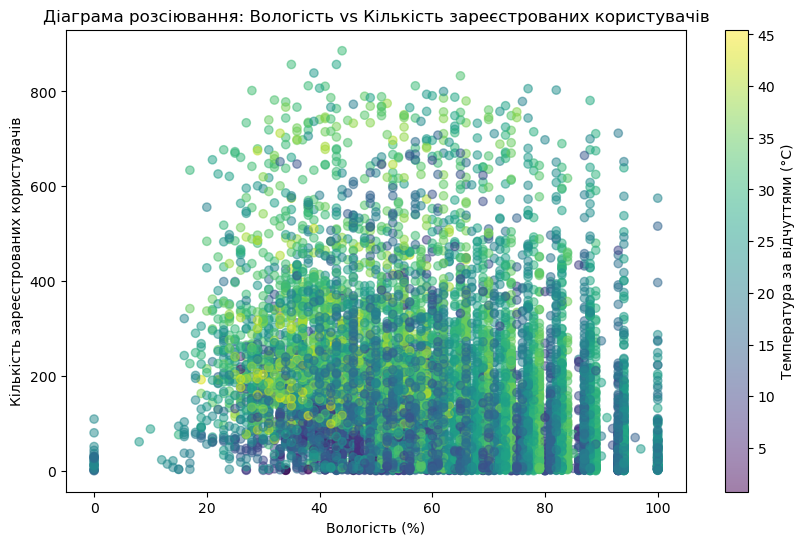

In [52]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['humidity'], df['registered'], c=df['atemp'], cmap='viridis', alpha=0.5)

plt.colorbar(scatter, label='Температура за відчуттями (°C)')
plt.title('Діаграма розсіювання: Вологість vs Кількість зареєстрованих користувачів')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)

На діаграмі можемо спостерігати те, що найбільша кількість зареєстрованих користувачів зафіксовано за комфортних умов: за вогологості повітря від 30% до 80% і температури повітря за відчуттями від 0°C до 25°C.